# Data Analysis Intern Test

## Purpose
The task is designed to challenge the prospective data analysis skillset in scripting, data collection via web scraping, data validation and  data visualization.

Data shoul be taken from https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf



# Setup

## Library import
We import all the required Python libraries

In [871]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime
import json
from numbers import Real
from pathlib import Path

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visuaization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()

# Data Cleaning and Exploration


## Web Scraping

I chose an easy way and used a DevTools/Netwoork on Google Chrome to get a curl command for downloading csv files.

This method is working while the session with the cookie is opened.

In [46]:
# download csv with current data
!curl 'https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf' \
  -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' \
  -H 'Accept-Language: ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7,ka;q=0.6' \
  -H 'Cache-Control: max-age=0' \
  -H 'Connection: keep-alive' \
  -H 'Content-Type: multipart/form-data; boundary=----WebKitFormBoundarySK2RwOr5tkro9SwD' \
  -H $'Cookie: primefaces.download=true; JSESSIONID=5BE77012BA7E79ABA65B1B43145CF12F; asig_persistence=\u00211ftDaqr3/J01gRkhkc6+zsEqWUHTqdos9bXgDppGbKhCgvVGs2QCkMJpU1270GHJ1Ob5VrD4ik1TzA==' \
  -H 'Origin: https://ocrportal.hhs.gov' \
  -H 'Referer: https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf' \
  -H 'Sec-Fetch-Dest: document' \
  -H 'Sec-Fetch-Mode: navigate' \
  -H 'Sec-Fetch-Site: same-origin' \
  -H 'Sec-Fetch-User: ?1' \
  -H 'Upgrade-Insecure-Requests: 1' \
  -H 'User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36' \
  -H 'sec-ch-ua: " Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-platform: "Linux"' \
  --data-raw $'------WebKitFormBoundarySK2RwOr5tkro9SwD\r\nContent-Disposition: form-data; name="ocrForm"\r\n\r\nocrForm\r\n------WebKitFormBoundarySK2RwOr5tkro9SwD\r\nContent-Disposition: form-data; name="ocrForm:reportResultTable_rppDD"\r\n\r\n100\r\n------WebKitFormBoundarySK2RwOr5tkro9SwD\r\nContent-Disposition: form-data; name="javax.faces.ViewState"\r\n\r\n-4105957072372541409:-1324308218337932463\r\n------WebKitFormBoundarySK2RwOr5tkro9SwD\r\nContent-Disposition: form-data; name="ocrForm:j_idt366"\r\n\r\nocrForm:j_idt366\r\n------WebKitFormBoundarySK2RwOr5tkro9SwD--\r\n' \
  -o ../data/raw/cur_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  110k  100  109k  100   534   9650     45  0:00:11  0:00:11 --:--:-- 34873  98


In [41]:
# download csv file with archive data
!curl 'https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf' \
  -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' \
  -H 'Accept-Language: ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7,ka;q=0.6' \
  -H 'Cache-Control: max-age=0' \
  -H 'Connection: keep-alive' \
  -H 'Content-Type: multipart/form-data; boundary=----WebKitFormBoundaryMgHdqQTNufMOmP4Y' \
  -H $'Cookie: primefaces.download=true; JSESSIONID=5BE77012BA7E79ABA65B1B43145CF12F; asig_persistence=\u00211ftDaqr3/J01gRkhkc6+zsEqWUHTqdos9bXgDppGbKhCgvVGs2QCkMJpU1270GHJ1Ob5VrD4ik1TzA==' \
  -H 'Origin: https://ocrportal.hhs.gov' \
  -H 'Referer: https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf' \
  -H 'Sec-Fetch-Dest: document' \
  -H 'Sec-Fetch-Mode: navigate' \
  -H 'Sec-Fetch-Site: same-origin' \
  -H 'Sec-Fetch-User: ?1' \
  -H 'Upgrade-Insecure-Requests: 1' \
  -H 'User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36' \
  -H 'sec-ch-ua: " Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-platform: "Linux"' \
  --data-raw $'------WebKitFormBoundaryMgHdqQTNufMOmP4Y\r\nContent-Disposition: form-data; name="ocrForm"\r\n\r\nocrForm\r\n------WebKitFormBoundaryMgHdqQTNufMOmP4Y\r\nContent-Disposition: form-data; name="ocrForm:reportResultTable_rppDD"\r\n\r\n100\r\n------WebKitFormBoundaryMgHdqQTNufMOmP4Y\r\nContent-Disposition: form-data; name="javax.faces.ViewState"\r\n\r\n-4105957072372541409:-2804608812472284926\r\n------WebKitFormBoundaryMgHdqQTNufMOmP4Y\r\nContent-Disposition: form-data; name="ocrForm:j_idt366"\r\n\r\nocrForm:j_idt366\r\n------WebKitFormBoundaryMgHdqQTNufMOmP4Y--\r\n' \
  -o ../data/raw/arch_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3419k  100 3419k  100   534    99k     15  0:00:35  0:00:34  0:00:01  348k


## Data Formatting and Data Validation

In [379]:
def prepare_data(input_path: Path, output_path: Path, category: str) -> None:
    """
    Function for transform and save raw data by chunks.
    Fill NaN cells with "no info" string for future analysis.
    Add "Date_Scraped" column – Insert the current date/time
    Add "Category" column: OCR_Breaches_Archive or OCR_Breaches_Current
    """
    
#     chunk iterator
    reader = pd.read_csv(input_path, parse_dates=['Breach Submission Date'], iterator=True, chunksize=10)
#     current date for 'Date_Scraped' column
    current_date = datetime.datetime.now()
    
#     read, transform and save chunks
    for i, data in enumerate(reader):
        # Set writing mode to append after first chunk
        mode = 'w' if i == 0 else 'a'
        # Add header if it is the first chunk
        header = i == 0
        
        data['Date_Scraped'] = current_date
        data['Category'] = category
        data['Individuals Affected'] = data['Individuals Affected'].apply(lambda x: -1 if pd.isna(x) else int(x))
        data['Web Description'] = data['Web Description'].apply(lambda x: 'no info' if pd.isna(x) else x)
        data.fillna('no info', inplace=True)
        data.to_csv(output_path, mode=mode, index=False, header=header, chunksize=10)
#     if return_data:
#         return data
    
    
class Data:
    """
    Returns a Data object
    Data object can return data sample and save every breach to JSON file,
    validating fields and data types
    
    """
    
#     columns names and types
    columns = {'Name of Covered Entity': str, 'State': str, 'Covered Entity Type': str,
       'Individuals Affected': int, 'Breach Submission Date': pd.Timestamp, 'Type of Breach': str,
       'Location of Breached Information': str, 'Business Associate Present': str,
       'Web Description': str, 'Date_Scraped': pd.Timestamp, 'Category': str}
    
    def __init__(self, path: str) -> None:
        self.__file_path = Path(path)
        if not self.__file_path.is_file():
            raise FileNotFoundError('Wrong path')            
    
    @property
    def file_path(self) -> Path:
        """
        Returns data file path
        """
        return self.__file_path
    
    def read_data_sample(self, nrows=10) -> pd.DataFrame:
        """
        Returns DataFrame sample
        """
        return pd.read_csv(self.__file_path, nrows=nrows)
    
    @classmethod
    def validate_col_types(cls, row: pd.Series) -> bool:
        """
        Validates a row for types matching
        Returns tuple with bool values: value in a row has a right type or not
        """
        return (True if type(item) == cls.columns[col] else False for item, col in zip(row, row.index))
    
    @classmethod
    def validate_columns(cls, cols: list) -> bool:
        """
        Validates columns in DataFrame
        Returns True if all table columns' names match with validation values
        """
        if sorted(cols) != sorted(cls.columns):
            return False
        return True
    
    def save_json(self, row: pd.Series, json_path: Path) -> None:
        """
        Validates a row and saves a JSON file with name as hash from the row
        Print Name of Entity and wrong values if type does not match
        """
        types_bool = self.validate_col_types(row)
        if all(types_bool):
            row.to_json(f'{json_path}/{hash(row.to_string())}.json')
        else:
            print(f'Name: {row[0]}:')
            for idx, val in enumerate(types_bool):
                if not val:
                    print(f'{row.index[idx]}: {row[idx]}')
                    
    def breach_to_json(self, path: str, nrows=None) -> None:
        """
        Saves every breach row to a JSON file if it passes validation
        """
        json_path = Path(path)
        json_path.mkdir(parents=True, exist_ok=True)
#         iterator for a chunk reading
        reader = pd.read_csv(self.__file_path, 
                             parse_dates=['Breach Submission Date', 'Date_Scraped'], 
                             nrows=nrows, 
                             iterator=True, 
                             chunksize=100, 
                             dtype={'Individuals Affected': 'Int32'}
                            ) 
#         validate chunks and save rows to JSON
        for chunk in tqdm(reader):     
            if self.validate_columns(chunk.columns):
                chunk.apply(lambda x: self.save_json(x, json_path), axis=1)

In [375]:
# transform raw current data 
prepare_data('../data/raw/cur_data.csv', '../data/interim/cur_data.csv', 'OCR_Breaches_Current')
# transform raw archive data 
prepare_data('../data/raw/arch_data.csv', '../data/interim/arch_data.csv', 'OCR_Breaches_Archive')

In [376]:
# create Data object for current breaches
current = Data('../data/interim/cur_data.csv')
# save every breach in current data to JSON files
current.breach_to_json('../data/processed_json/current')

9it [00:00, 20.75it/s]


In [378]:
# create Data object for current archive
archive = Data('../data/interim/arch_data.csv')
# save every breach in archive data to JSON files
archive.breach_to_json('../data/processed_json/archive/')

46it [00:02, 20.73it/s]


# Data Visualization and Statistical Analysis

I would like to explore an archive data.

In [860]:
arch_data = pd.read_csv('../data/interim/arch_data.csv', 
                             dtype={'Individuals Affected': 'Int32'}, 
                             parse_dates=['Breach Submission Date', 'Date_Scraped']
                       )
cur_data = pd.read_csv('../data/interim/cur_data.csv', 
                             dtype={'Individuals Affected': 'Int32'}, 
                             parse_dates=['Breach Submission Date', 'Date_Scraped']
                       )

In [861]:
# concatenate both datasets for explaration
data = pd.concat([arch_data, cur_data]).sort_values('Breach Submission Date')

In [862]:
data.head()

Name of Covered Entity State  \
4518                         Brooke Army Medical Center    TX   
4517          Mid America Kidney Stone Association, LLC    MO   
4516    Alaska Department of Health and Social Services    AK   
4515  Health Services for Children with Special Need...    DC   
4510                           L. Douglas Carlson, M.D.    CA   

      Covered Entity Type  Individuals Affected Breach Submission Date  \
4518  Healthcare Provider                  1000             2009-10-21   
4517  Healthcare Provider                  1000             2009-10-28   
4516  Healthcare Provider                   501             2009-10-30   
4515          Health Plan                  3800             2009-11-17   
4510  Healthcare Provider                  5257             2009-11-20   

     Type of Breach         Location of Breached Information  \
4518          Theft                              Paper/Films   
4517          Theft                           Network Server   
4516          Theft  Other, Other Portable Electronic Device   
4515           Loss                                   Laptop   
4510          Theft                         Desktop Computer   

     Business Associate Present  \
4518                         No   
4517                         No   
4516                         No   
4515                         No   
4510                         No   

                                        Web Description  \
4518  A binder containing the protected health infor...   
4517  Five desktop computers containing unencrypted ...   
4516  The Alaska Department of Health and Social Ser...   
4515  A laptop was lost by an employee while in tran...   
4510  A shared Computer that was used for backup was...   

                   Date_Scraped              Category  
4518 2023-05-26 20:12:04.763472  OCR_Breaches_Archive  
4517 2023-05-26 20:12:04.763472  OCR_Breaches_Archive  
4516 2023-05-26 20:12:04.763472  OCR_Breaches_Archive  
4515 2023-05-26 20:12:04.763472  OCR_Breaches_Archive  
4510 2023-05-26 20:12:04.763472  OCR_Breaches_Archive

In [873]:
sns.set_style("darkgrid")
sns.set(font_scale=1.3, font='monospace')
pal = sns.color_palette('rocket')

# functions for plots

def barplot(data: pd.DataFrame, title_name:str, x_label: str, bar_label=False, order=None, rot=None, pad=0):
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(data=data, palette='rocket', order=order)
    if bar_label:
        for container in ax.containers:
            ax.bar_label(container, rotation=rot, padding=pad, )
    plt.title(title_name, fontweight='bold', pad=pad * 5)
    plt.xticks(rotation=rot)
    plt.yticks(rotation=0)
    plt.xlabel(x_label)
    plt.ylabel("Count")
    
def histplot(data: pd.DataFrame, col: str, title_name:str, x_label: str, 
             bins='auto', mult='layer', hue=None, kde=False, color=None, bar_label=False, rot=None, pad=1):
    plt.figure(figsize=(15, 8))
    ax = sns.histplot(data=data, x=col, bins=bins, color=pal[3], kde=kde, multiple=mult, hue=hue)
    if bar_label:
        for container in ax.containers:
            ax.bar_label(container, rotation=rot, padding=pad, )
    plt.title(title_name, fontweight='bold', pad=pad * 5)
    plt.xticks(rotation=rot)
    plt.yticks(rotation=0)
    plt.xlabel(x_label)
    plt.ylabel("Count")
    
def countplot(data, col, title, x_label: str, hue, y_label='Count', pal=None, order_list=None, hue_order=None, bar_label=False, rot=None, pad=0):
    plt.figure(figsize=(15, 8))
    ax = sns.countplot(data, x=col, hue=hue, order=order_list, palette=pal, hue_order=hue_order)
    if bar_label:
        for container in ax.containers:
            ax.bar_label(container, rotation=rot, padding=pad, )
    plt.title(title, fontweight='bold', pad=pad * 5)
    plt.xticks(rotation=45)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()
    
def lineplot(data, x_col, y_col, x_label, title, y_label, hue, ticks):
    plt.figure(figsize=(15, 8))
    ax = sns.lineplot(x=x_col, 
                 y=y_col, hue=hue, 
                 data=data,
                 linewidth = 3,                 )
    ax.set_xticks(ticks)
    plt.title(title, fontweight='bold')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

I would like to filter the data for 2023

In [874]:
# add year column
data['breach_year'] = data['Breach Submission Date'].dt.year
data = data[data.breach_year < 2023]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


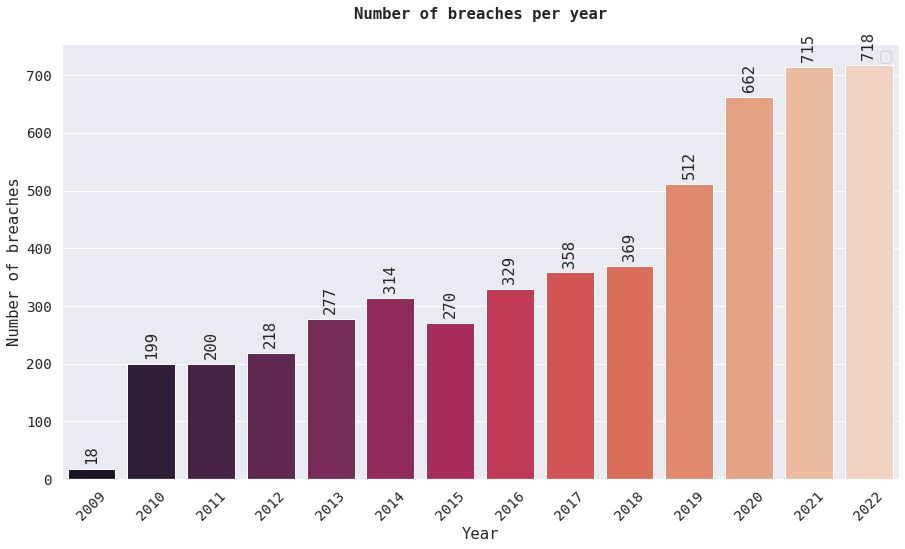

In [508]:
countplot(
    data, 
    'breach_year', 
    'Number of breaches per year', 
    'Year',
    hue=None, 
    y_label='Number of breaches',
    pal='rocket',
    order_list=sorted(data['breach_year'].unique()),
    rot=90,
    pad=5,
    bar_label=True
)

Healthcare breaches continue to climb every year. 

There was a 7.7% increase in
breaches from 2020 to 2021. 

There were 715 reported healthcare
breaches in 2021 and almost the same value 718 in 2022 making it the largest number of breaches recorded
in a single year.

<ipython-input-624-79b8d7bedad1>:2: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



Text(0, 0.5, 'Number of breaches')

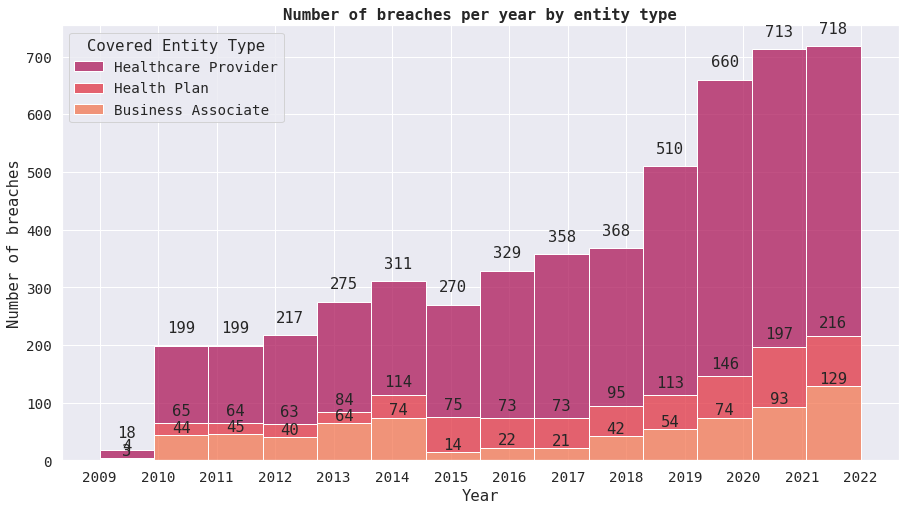

In [624]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(
    data[~data['Covered Entity Type'].isin(['no info', 'Healthcare Clearing House'])],
    bins=14,
    x='breach_year', 
    hue='Covered Entity Type', 
    multiple='stack', 
    palette=pal[2:]
)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, rotation=0, padding=i*5)
ax.set_xticks(sorted(data['breach_year'].unique()))
plt.title('Number of breaches per year by entity type', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of breaches')

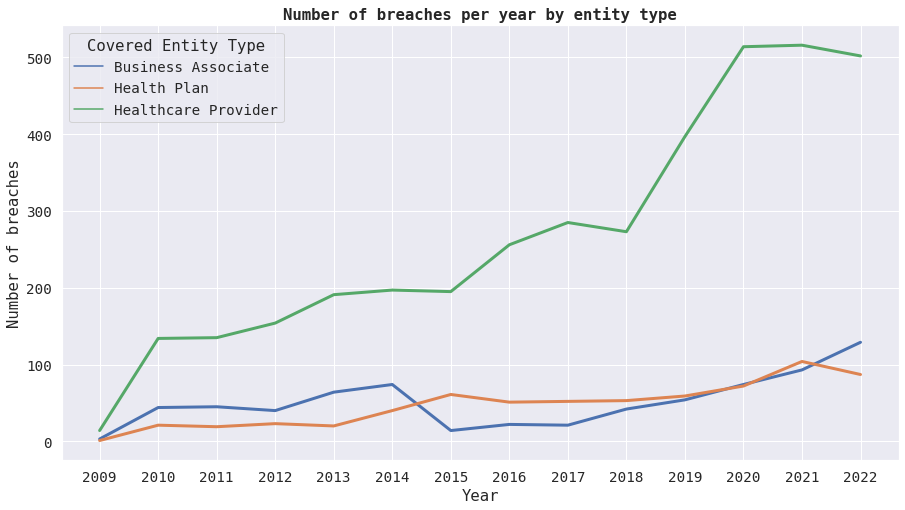

In [727]:
data_pivot_year_entity = data[~data['Covered Entity Type'].isin(['no info', 'Healthcare Clearing House'])].groupby(
    ['breach_year', 'Covered Entity Type']
).size(
).reset_index(
).rename(columns={0: 'Count'})

lineplot(
    data_pivot_year_entity,
    'breach_year',
    'Count',
    'Year',
    'Number of breaches per year by entity type',
    'Number of breaches',
    'Covered Entity Type',
    sorted(data['breach_year'].unique())   
)

This chart shows changes in number of breaches per year by 3 entity types.

The largest contribution is made by Healthcare providers reaching more than 500 breaches by 2020 year while others conribute low number of breaches. Healthcare Provider breaches climb every year from 2009 to 2021 year with a small dip in 2022. 

At the same time, Health plan and Business Associate breaches grows slighly over the years reaching about 100 breaches by 2021 year.

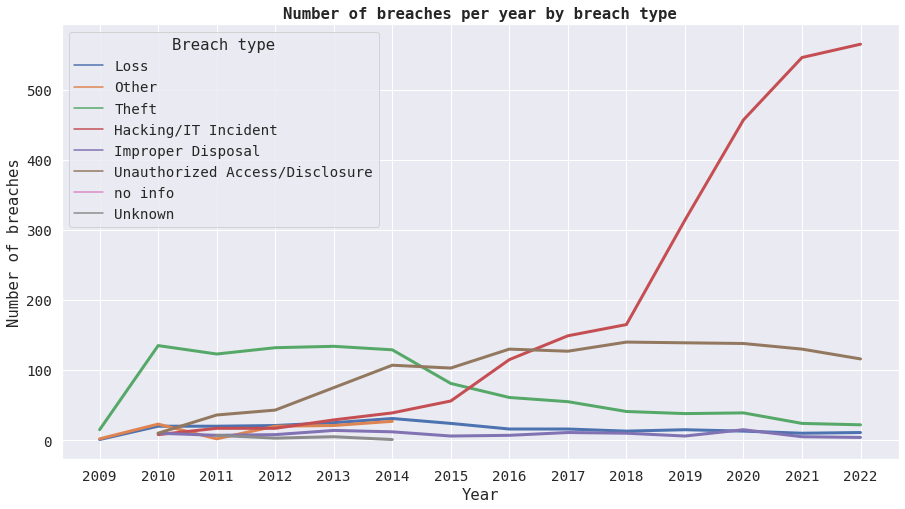

In [864]:
data['Breach type'] = data['Type of Breach'].apply(lambda x: x.split(', '))
data_pivot_year_type_breach = data[['breach_year', 'Breach type']].explode('Breach type').groupby(
    ['breach_year', 'Breach type']
).size(
).reset_index(
).rename(columns={0: 'Count',})


lineplot(
    data_pivot_year_type_breach,
    'breach_year',
    'Count',
    'Year',
    'Number of breaches per year by breach type',
    'Number of breaches',
    'Breach type',
    sorted(data['breach_year'].unique())   
)

The primary categories are Hacking,
Theft and Unauthorized Access/Disclosure. 

While there are multiple sources of data breach, the high breach
trend is mostly due to hacking which is clearly visible in the graphs.

The number of theft breaches remained the same from 2010 to 2014 and started decreasing to its lowest point in 2022.

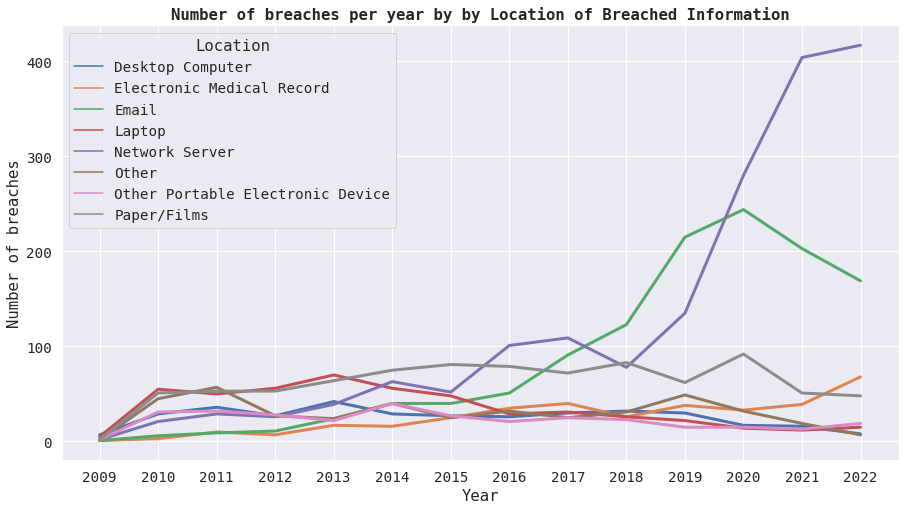

In [865]:
data['Location'] = data['Location of Breached Information'].apply(lambda x: x.split(', '))
data_pivot_year_type_breach = data[['breach_year', 'Location']].explode('Location').groupby(
    ['breach_year', 'Location']
).size(
).reset_index(
).rename(columns={0: 'Count',})

lineplot(
    data_pivot_year_type_breach,
    'breach_year',
    'Count',
    'Year',
    'Number of breaches per year by by Location of Breached Information',
    'Number of breaches',
    'Location',
    sorted(data['breach_year'].unique())   
)

The top three sources included Network Server, Email and Paper/Films were used for stealing data.
There are more than 800 breaches were done from Network Servers in 2021 and 2022 while number of Email breaches decreased at the same years.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


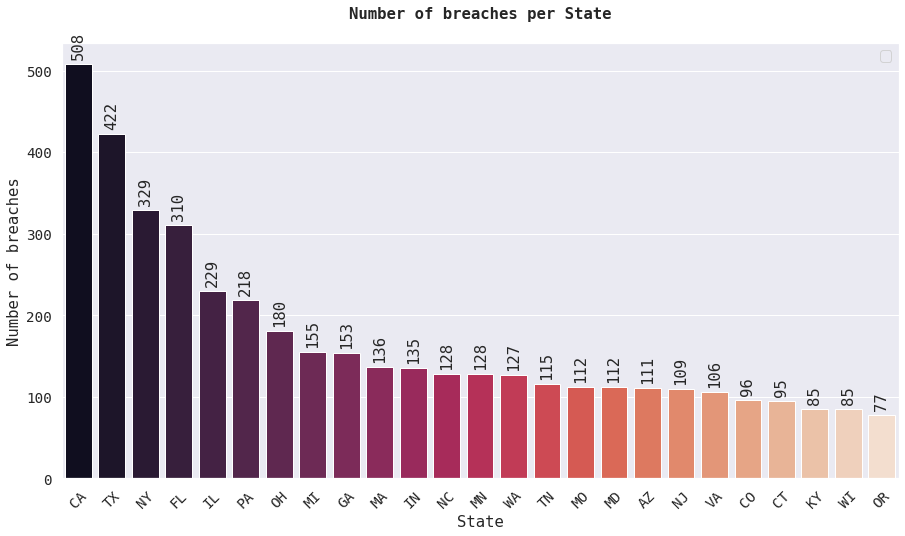

In [721]:
countplot(
    data, 
    'State', 
    'Number of breaches per State', 
    'State',
    hue=None, 
    y_label='Number of breaches',
    pal='rocket',
    order_list=data.State.value_counts().index[:25],
    rot=90,
    pad=5,
    bar_label=True
)

This chart shows number of breaches сommitted in top 25 states.
There is clearly visible that the highest amount of breaches were in California, Texas and New York states.

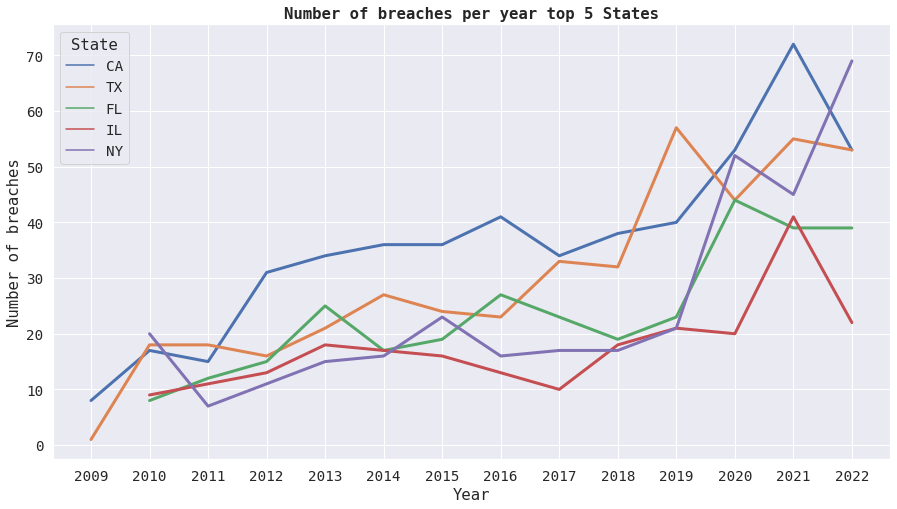

In [731]:
data_pivot_year_state = data[data['State'].isin(data.State.value_counts().index[:5])][['breach_year', 'State']].groupby(
    ['breach_year', 'State']
).size(
).reset_index(
).rename(columns={0: 'Count',})

lineplot(
    data_pivot_year_state,
    'breach_year',
    'Count',
    'Year',
    'Number of breaches per year top 5 States',
    'Number of breaches',
    'State',
    sorted(data['breach_year'].unique())   
)

Graphs show fluctuations and growth of breaches in all 5 states during the entire observation period.

In [749]:
data['Individuals Affected'].describe()

count            5159.0
mean       75036.017251
std      1166019.350329
min                -1.0
25%              1140.5
50%              3200.0
75%             14219.5
max          78800000.0
Name: Individuals Affected, dtype: Float64

In describing table above shown that number of affected individuals has outliers, so I will filter values more than 50000. 

/home/arcry/anaconda3/envs/nerenv/lib/python3.8/site-packages/seaborn/distributions.py:499: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/home/arcry/anaconda3/envs/nerenv/lib/python3.8/site-packages/seaborn/distributions.py:500: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



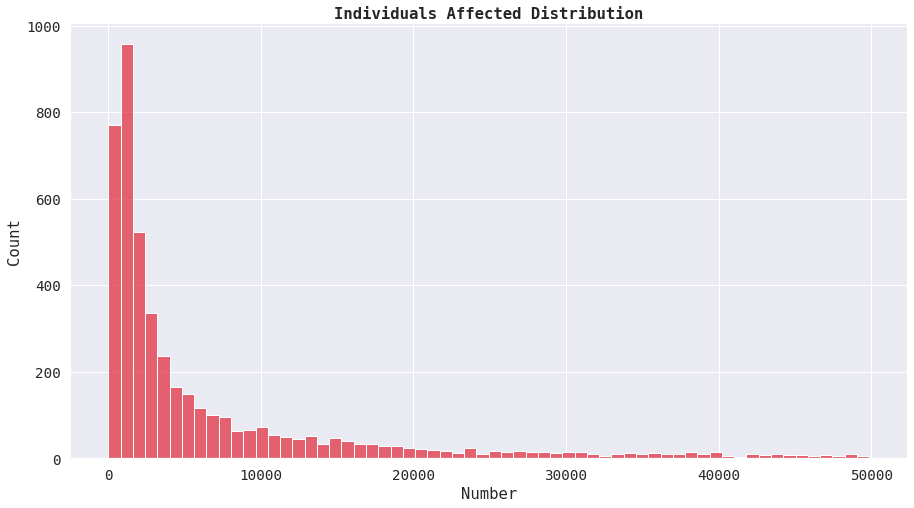

In [750]:
histplot(
    data[data['Individuals Affected'] < 50000],
    'Individuals Affected', 
    'Individuals Affected Distribution', 
    'Number'
)

This distribution shows that they are most often affected number of people not exceed than 10000 and large breaches are less common.

<ipython-input-765-6adee1d21aac>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



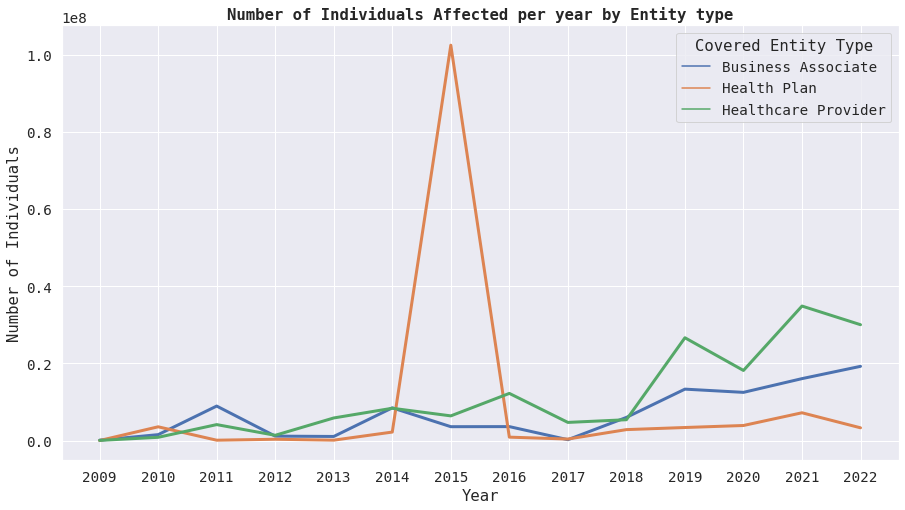

In [765]:
data_pivot_affected_entity = data[
     ~data['Covered Entity Type'].isin(['no info', 'Healthcare Clearing House'])
].groupby(
    ['breach_year', 'Covered Entity Type']
).sum(
).reset_index(
)

lineplot(
    data_pivot_affected_entity,
    'breach_year',
    'Individuals Affected',
    'Year',
    'Number of Individuals Affected per year by Entity type',
    'Number of Individuals',
    'Covered Entity Type',
    sorted(data['breach_year'].unique())   
)

This chart shows changes in number of Individuals Affected per year by 3 entity types.

Generally, the number of records lost has increased over the years.

The largest contribution is made by Healthcare providers reaching more than 40 millions people by 2022 year.

At the same time, Business Associate and Health plan number of victims grows slighly over the period reaching less than 2M and 1M people by 2022 respectively.

With the exception of a few very large data breaches in 2015, Health Plan plot has a peak with a value more than 100M, it can be an outlier or a very big breach.



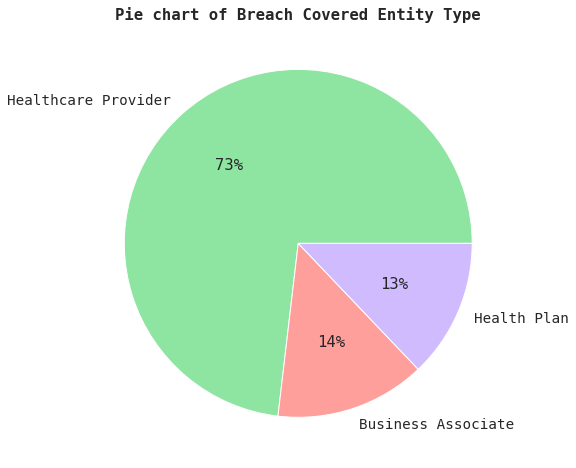

In [833]:
breach_entity_type_cnt = data[
     ~data['Covered Entity Type'].isin(['no info', 'Healthcare Clearing House'])
].groupby(
    'Covered Entity Type'
).size(
).reset_index(
).rename(
    columns={0: 'Count'}
).sort_values(
    'Count', ascending=False
)

colors = sns.color_palette('pastel')[2:]
plt.figure(figsize=(15, 8))
ax = plt.pie(breach_entity_type_cnt.Count, labels = breach_entity_type_cnt['Covered Entity Type'], colors = colors, autopct='%.0f%%')
plt.title('Pie chart of Breach Covered Entity Type', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

Healthcare providers occupies the leading position of all time in terms of the number of breaches 73%, while
Health Plan and Business Associate entities have 13% and 14% respectively.

<ipython-input-815-34aefb4bfd29>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



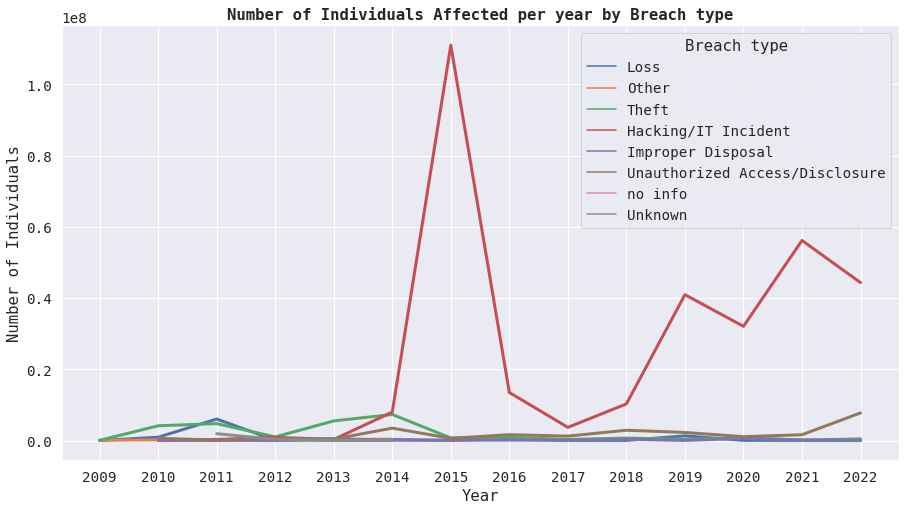

In [815]:
data_pivot_affected_breach_type = data.explode('Breach type').groupby(
    ['breach_year', 'Breach type']
).sum(
).reset_index(
)

lineplot(
    data_pivot_affected_breach_type,
    'breach_year',
    'Individuals Affected',
    'Year',
    'Number of Individuals Affected per year by Breach type',
    'Number of Individuals',
    'Breach type',
    sorted(data['breach_year'].unique())   
)

The chart shows that the number of breach victims by Haking/IT Incident had been noticeably growing up from 2014 
with a large peak in 2015.

Other breaches do not make a significant contribution.

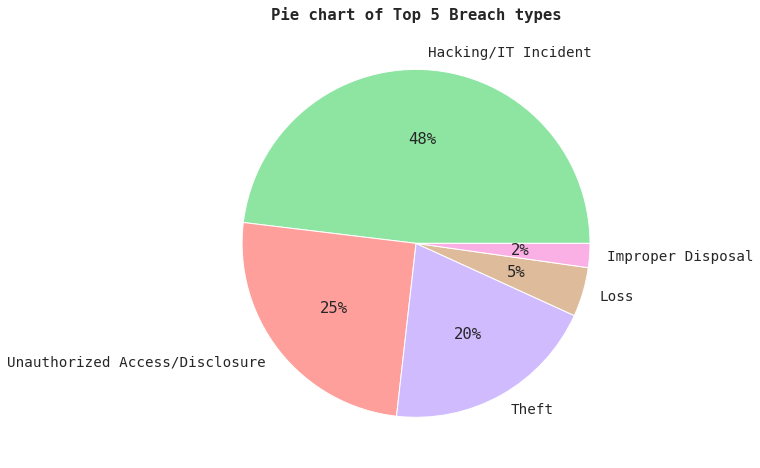

In [825]:
breach_type_cnt = data.explode(
    'Breach type'
).groupby(
    'Breach type'
).size(
).reset_index(
).rename(
    columns={0: 'Count'}
).sort_values(
    'Count', ascending=False
)[:5]

colors = sns.color_palette('pastel')[2:]
plt.figure(figsize=(15, 8))
ax = plt.pie(breach_type_cnt.Count, labels = breach_type_cnt['Breach type'], colors = colors, autopct='%.0f%%')
plt.title('Pie chart of Top 5 Breach types', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

At 48% of healthcare breaches in overall were due to hacking. 

The number of breaches due to
"Unauthorized Access/Disclosure" came in at a distant second place,
but still had a visible impact on breach counts. 

The third place is Theft breaches with 20%.

<ipython-input-826-f5c436b26e2d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



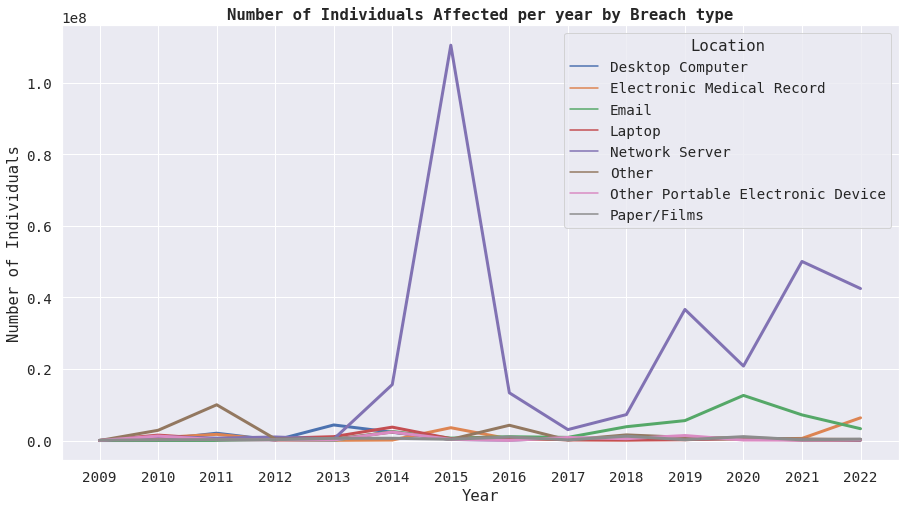

In [826]:
data_pivot_affected_location = data.explode('Location').groupby(
    ['breach_year', 'Location']
).sum(
).reset_index(
)

lineplot(
    data_pivot_affected_location,
    'breach_year',
    'Individuals Affected',
    'Year',
    'Number of Individuals Affected per year by Breach type',
    'Number of Individuals',
    'Location',
    sorted(data['breach_year'].unique())   
)

A significant amount of breaches were happened from Network Servers through Hacking as it has been shown earlier.

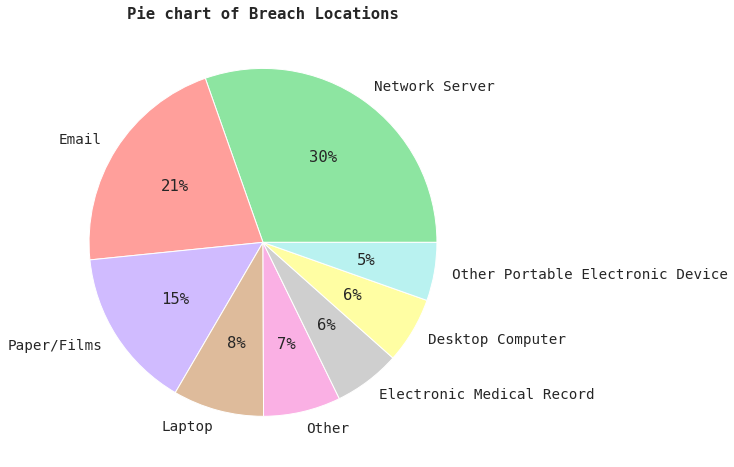

In [829]:
breach_type_cnt = data.explode(
    'Location'
).groupby(
    'Location'
).size(
).reset_index(
).rename(
    columns={0: 'Count'}
).sort_values(
    'Count', ascending=False
)

colors = sns.color_palette('pastel')[2:]
plt.figure(figsize=(15, 8))
ax = plt.pie(breach_type_cnt.Count, labels = breach_type_cnt['Location'], colors = colors, autopct='%.0f%%')
plt.title('Pie chart of Breach Locations', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

The most common location for a breach appears to be a network server, accounting for 31% of reported breaches. 

Email is the second most common location, accounting for 21% of reported breaches. 

Paper/Films, Laptop, and Other are also locations where breaches have occurred, accounting for 15%, 8%, and 7% of reported breaches, respectively.

In [859]:
data

Name of Covered Entity State  \
4518                         Brooke Army Medical Center    TX   
4517          Mid America Kidney Stone Association, LLC    MO   
4516    Alaska Department of Health and Social Services    AK   
4515  Health Services for Children with Special Need...    DC   
4510                           L. Douglas Carlson, M.D.    CA   
...                                                 ...   ...   
6     Illinois Department of Healthcare and Family S...    IL   
3     R&B Corporation of Virginia d/b/a Credit Contr...    VA   
2                          Lehigh Valley Health Network    PA   
1                   Fertility Specialists Medical Group    CA   
0                        Tennessee Orthopaedic Clinics     TN   

      Covered Entity Type  Individuals Affected Breach Submission Date  \
4518  Healthcare Provider                  1000             2009-10-21   
4517  Healthcare Provider                  1000             2009-10-28   
4516  Healthcare Provider                   501             2009-10-30   
4515          Health Plan                  3800             2009-11-17   
4510  Healthcare Provider                  5257             2009-11-20   
...                   ...                   ...                    ...   
6             Health Plan                 50839             2023-05-12   
3      Business Associate                345523             2023-05-13   
2     Healthcare Provider                   627             2023-05-15   
1     Healthcare Provider                  9437             2023-05-15   
0     Healthcare Provider                   500             2023-05-19   

           Type of Breach         Location of Breached Information  \
4518                Theft                              Paper/Films   
4517                Theft                           Network Server   
4516                Theft  Other, Other Portable Electronic Device   
4515                 Loss                                   Laptop   
4510                Theft                         Desktop Computer   
...                   ...                                      ...   
6     Hacking/IT Incident                           Network Server   
3     Hacking/IT Incident                           Network Server   
2     Hacking/IT Incident                           Network Server   
1     Hacking/IT Incident                           Network Server   
0     Hacking/IT Incident                           Network Server   

     Business Associate Present  \
4518                         No   
4517                         No   
4516                         No   
4515                         No   
4510                         No   
...                         ...   
6                            No   
3                           Yes   
2                            No   
1                            No   
0                            No   

                                        Web Description  \
4518  A binder containing the protected health infor...   
4517  Five desktop computers containing unencrypted ...   
4516  The Alaska Department of Health and Social Ser...   
4515  A laptop was lost by an employee while in tran...   
4510  A shared Computer that was used for backup was...   
...                                                 ...   
6                                               no info   
3                                               no info   
2                                               no info   
1                                               no info   
0                                               no info   

                   Date_Scraped              Category  
4518 2023-05-26 20:12:04.763472  OCR_Breaches_Archive  
4517 2023-05-26 20:12:04.763472  OCR_Breaches_Archive  
4516 2023-05-26 20:12:04.763472  OCR_Breaches_Archive  
4515 2023-05-26 20:12:04.763472  OCR_Breaches_Archive  
4510 2023-05-26 20:12:04.763472  OCR_Breaches_Archive  
...                         ...                   ...  


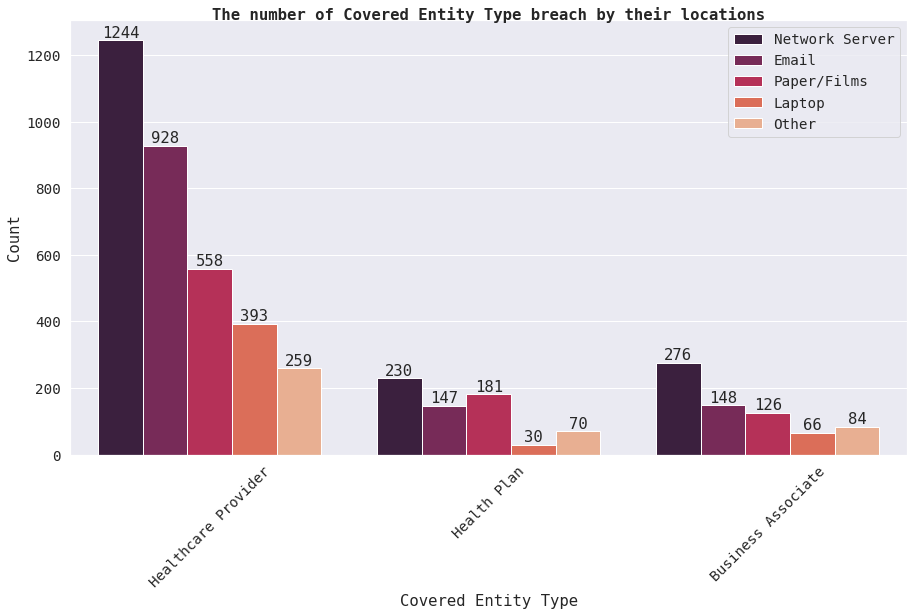

In [867]:
countplot(
    data[
     ~data['Covered Entity Type'].isin(['no info', 'Healthcare Clearing House'])
    ].explode('Location'),
    'Covered Entity Type', 
    'The number of Covered Entity Type breach by their locations', 
    'Covered Entity Type',
    hue='Location', 
    hue_order=data.explode('Location').Location.value_counts().index[:5],
    pal='rocket', 
    #           order_list=balance_order,
    bar_label=True
)

The number of Network server's breaches predominates in all Entity types with the highest value in Heathcare Provider.

Email breaches are on the second place with 928 breaches in Heathcare Provider entity.

In two others entities (Health Plan and Business Associate) Network Servers, Email and Paper/Films breaches almost equal and no so high.

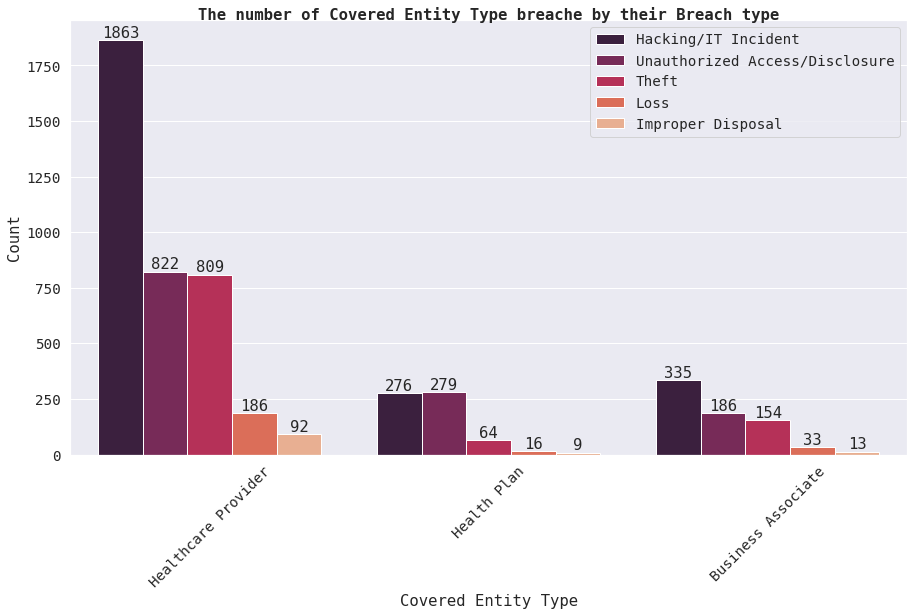

In [868]:
countplot(
    data[
     ~data['Covered Entity Type'].isin(['no info', 'Healthcare Clearing House'])
    ].explode('Breach type'),
    'Covered Entity Type', 
    'The number of Covered Entity Type breache by their Breach type', 
    'Covered Entity Type',
    hue='Breach type', 
    hue_order=data.explode('Breach type')['Breach type'].value_counts().index[:5],
    pal='rocket', 
    #           order_list=balance_order,
    bar_label=True
)

More than double the number of Hacking/IT Incident breaches (1863) compared to Unauthorized Access (822) and Thefts (809) in Heathcare Provider entity.

In the Health Plan entity the number on Hacking/IT Incident and Unauthorized Access breaches almost equal (276 and 279 relatively).


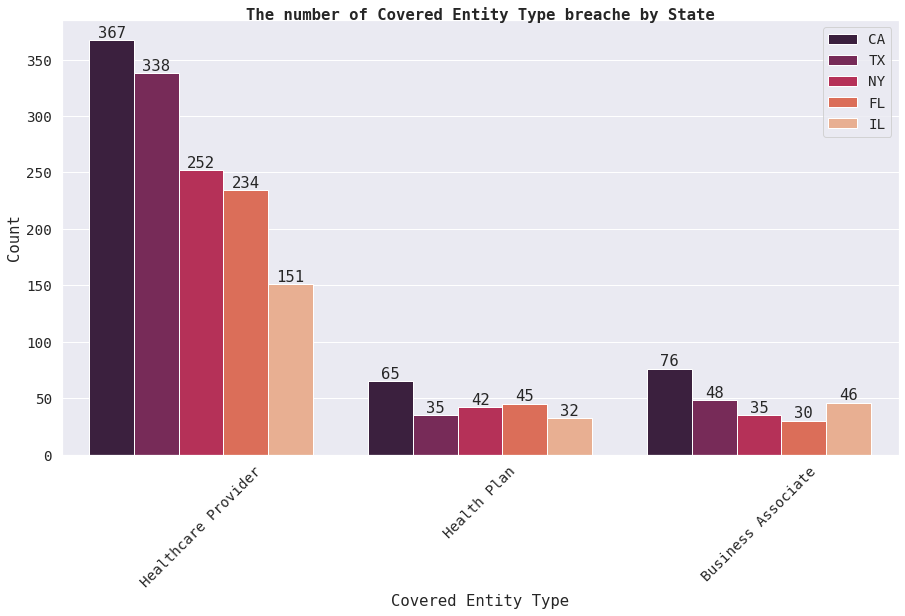

In [869]:
countplot(
    data[
     ~data['Covered Entity Type'].isin(['no info', 'Healthcare Clearing House'])
    ],
    'Covered Entity Type', 
    'The number of Covered Entity Type breache by State', 
    'Covered Entity Type',
    hue='State', 
    hue_order=data['State'].value_counts().index[:5],
    pal='rocket', 
    #           order_list=balance_order,
    bar_label=True
)

The difference in breaches across the States is not so significant, but California is at the top in all entities.

# Summarization

1. Throughout the observation period, there was a steady increase in the number of breaches, with a peak of 718 in 2022.
2. Healthcare providers were responsible for the majority of breaches, with over 500 reported by 2020. These breaches increased each year from 2009 to 2021, with a slight dip in 2022. Health plan and business associate breaches also increased slightly, with around 100 reported by 2021.
3. While there are various sources of data breaches, the trend is largely due to hacking, accounting for 48% of healthcare breaches overall.
4. The number of theft breaches remained constant from 2010 to 2014 before decreasing to its lowest point in 2022, accounting for 20% of the total number.
5. The majority of data was stolen from network servers, which accounted for 30% of breaches. Over 800 breaches were reported in 2021 and 2022 alone.
6. Although the number of email hacks decreased in 2020, they still accounted for 20% of all data stolen.
7. The states with the highest number of breaches were California, Texas, and New York, with an increasing trend in each state.
8. Breaches that affected fewer than 10,000 people were the most common, and large breaches were less frequent.
9. The number of lost records increased over time, with healthcare providers responsible for over 40 million victims by 2022. Business associates and health plans had slightly fewer victims, with less than 2 million and 1 million respectively by 2022. Health plans had a peak of over 100 million affected people, which could be an outlier or a significant breach.
10. The number of victims affected by hacking/IT incidents has steadily increased since 2014, with a large peak in 2015 (over 100 million records).
11. The majority of these 100 million records were stolen from network servers.
12. Network server breaches were the most common in all entity types, with healthcare providers having the highest number. Email breaches were second, with 928 reported in the healthcare provider entity.
13. Healthcare providers had more than double the number of hacking/IT incident breaches (1863) compared to unauthorized access (822) and thefts (809). In the health plan entity, the number of hacking/IT incident and unauthorized access breaches was almost equal (276 and 279 respectively).
14. California was the top state for breaches in all entity types.